# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 651


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [45]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url).json()
        # Parse the JSON and retrieve data
        city_weather = response

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | simanggang
Processing Record 4 of Set 1 | corn island
Processing Record 5 of Set 1 | ust-nera
Processing Record 6 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 7 of Set 1 | fada
Processing Record 8 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | labytnangi
Processing Record 12 of Set 1 | merizo village
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | queenstown
Processing Record 15 of Set 1 | yuzhno-kurilsk
Processing Record 16 of Set 1 | isafjordur
Processing Record 17 of Set 1 | khovd
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | kapa'a
Processing Record 20 of Set 1 | petropavlovsk-kamchatsky
Proces

In [46]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          624
Lat           624
Lng           624
Max Temp      624
Humidity      624
Cloudiness    624
Wind Speed    624
Country       624
Date          624
dtype: int64

In [47]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,11.69,69,3,10.16,SH,1697423391
1,port alfred,-33.5906,26.8910,17.32,93,100,2.24,ZA,1697423391
2,simanggang,1.2472,111.4528,30.99,70,20,1.54,MY,1697423391
3,corn island,12.1694,-83.0418,29.52,72,14,2.75,NI,1697423391
4,ust-nera,64.5667,143.2000,-13.21,95,50,2.68,RU,1697423391


In [48]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [49]:
# Read saved data
df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.69,69,3,10.16,SH,1697423391
1,port alfred,-33.5906,26.8910,17.32,93,100,2.24,ZA,1697423391
2,simanggang,1.2472,111.4528,30.99,70,20,1.54,MY,1697423391
3,corn island,12.1694,-83.0418,29.52,72,14,2.75,NI,1697423391
4,ust-nera,64.5667,143.2000,-13.21,95,50,2.68,RU,1697423391


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

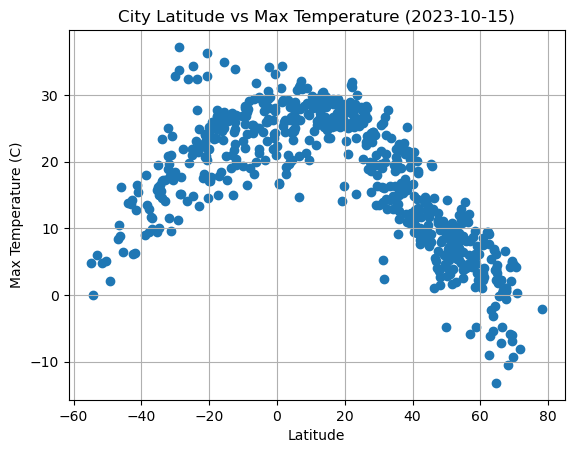

In [50]:
# Build scatter plot for latitude vs. temperature
x_vals = df['Lat']
y_vals = df['Max Temp']
plt.scatter(x_vals,y_vals)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs Max Temperature (2023-10-15)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

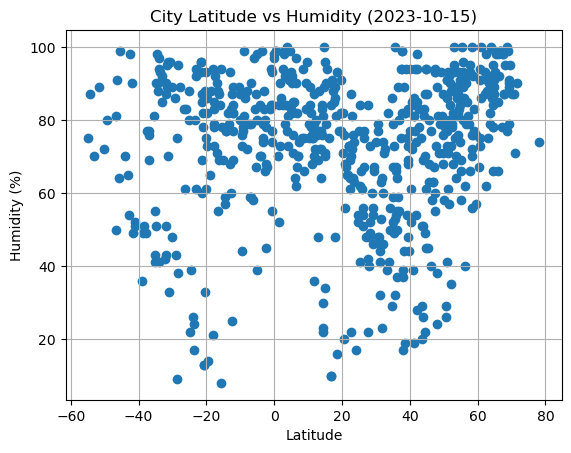

In [51]:
# Build the scatter plots for latitude vs. humidity
x_vals = df['Lat']
y_vals = df['Humidity']
plt.scatter(x_vals,y_vals)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (2023-10-15)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

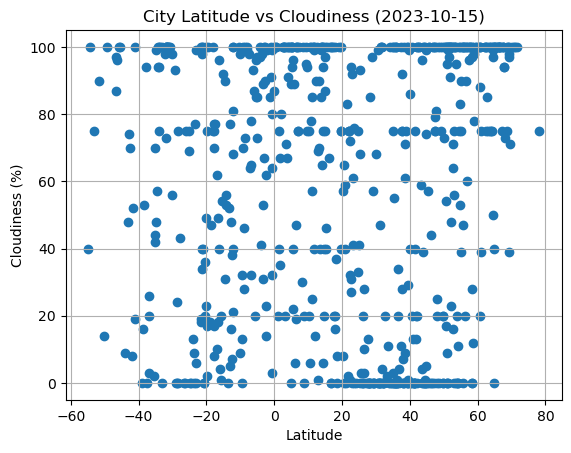

In [52]:
# Build the scatter plots for latitude vs. cloudiness
x_vals = df['Lat']
y_vals = df['Cloudiness']
plt.scatter(x_vals,y_vals)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (2023-10-15)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

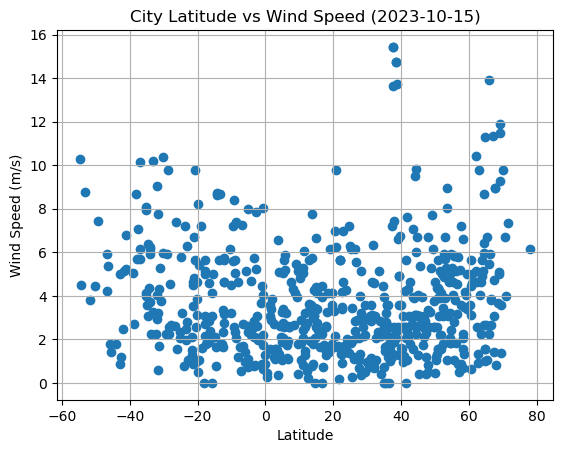

In [53]:
# Build the scatter plots for latitude vs. wind speed
x_vals = df['Lat']
y_vals = df['Wind Speed']
plt.scatter(x_vals,y_vals)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed (2023-10-15)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [54]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df[df['Lat'] >= 0] 

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,simanggang,1.2472,111.4528,30.99,70,20,1.54,MY,1697423391
3,corn island,12.1694,-83.0418,29.52,72,14,2.75,NI,1697423391
4,ust-nera,64.5667,143.2000,-13.21,95,50,2.68,RU,1697423391
5,fada,9.5667,8.3000,20.20,96,94,0.41,NG,1697423392
7,albany,42.6001,-73.9662,8.92,83,100,1.79,US,1697423392


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df[df['Lat'] < 0] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,11.69,69,3,10.16,SH,1697423391
1,port alfred,-33.5906,26.8910,17.32,93,100,2.24,ZA,1697423391
6,east london,-33.0153,27.9116,17.30,92,100,10.18,ZA,1697423392
10,adamstown,-25.0660,-130.1015,21.92,80,69,2.32,PN,1697423392
11,queenstown,-31.8976,26.8753,11.57,90,100,2.93,ZA,1697423392


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7875182448386322


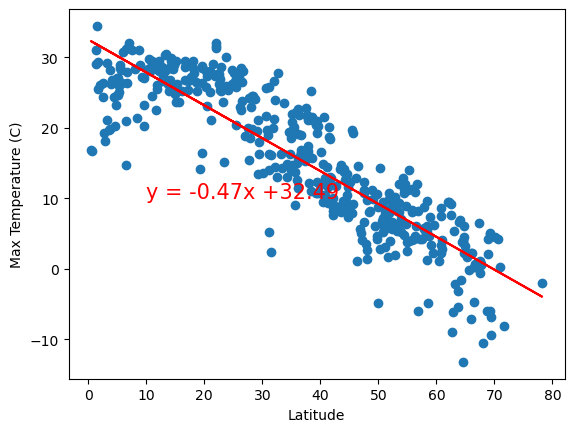

In [58]:
# Linear regression on Northern Hemisphere
# Create Scatter plot
x_vals = northern_hemi_df['Lat']
y_vals = northern_hemi_df['Max Temp']
plt.scatter(x_vals,y_vals)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Linear regression with northern hemi df
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_vals * slope + intercept

# plot regression line and equation
plt.annotate(line_eq,(10,10),fontsize=15,color='red')
plt.plot(x_vals,regress_values,'r-')

# Print r value
print(f'The r-squared value is: {rvalue**2}')

plt.show()

The r-squared value is: 0.5076353320733421


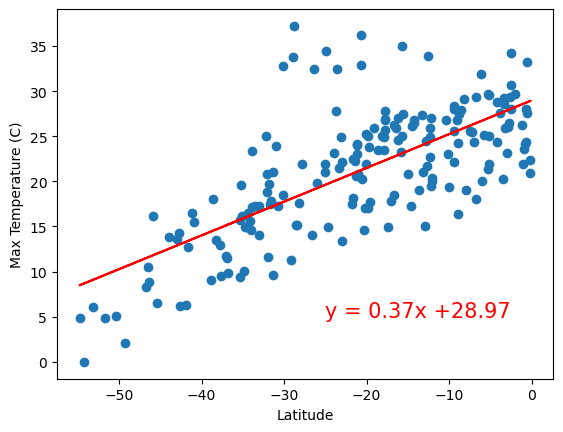

In [62]:
# Linear regression on Southern Hemisphere
# Create Scatter plot
x_vals = southern_hemi_df['Lat']
y_vals = southern_hemi_df['Max Temp']
plt.scatter(x_vals,y_vals)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Linear regression with northern hemi df
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_vals * slope + intercept

# plot regression line and equation
plt.annotate(line_eq,(-25,5),fontsize=15,color='red')
plt.plot(x_vals,regress_values,'r-')

# Print r value
print(f'The r-squared value is: {rvalue**2}')

plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere there is a strong linear relationship between latitude and max temperature. This makes sense, especially to us, because as we go further north we typically expect it to get colder. In the Southern Hemisphere there is a moderate positive linear relationship between latitude and max temperature. This also makes sense since we get warmer when we get closer to the equator - In the Southern Hemisphere the value of the latitude actually increase as we get closer to equator (and would expect higher temps) since latitudes are negative. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.018730726565262514


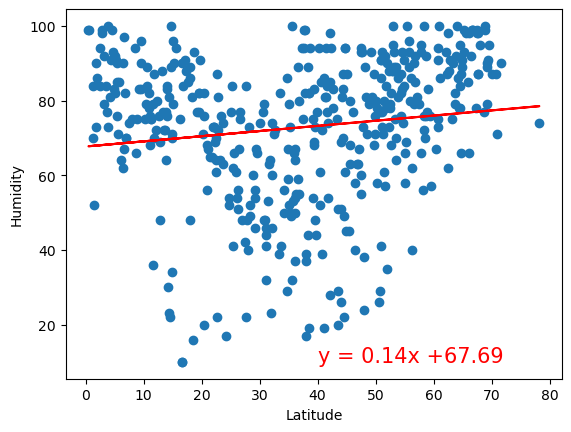

In [63]:
# Northern Hemisphere
# Create Scatter plot
x_vals = northern_hemi_df['Lat']
y_vals = northern_hemi_df['Humidity']
plt.scatter(x_vals,y_vals)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Linear regression with northern hemi df
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_vals * slope + intercept

# plot regression line and equation
plt.annotate(line_eq,(40,10),fontsize=15,color='red')
plt.plot(x_vals,regress_values,'r-')

# Print r value
print(f'The r-squared value is: {rvalue**2}')

plt.show()

The r-squared value is: 0.014047040397383633


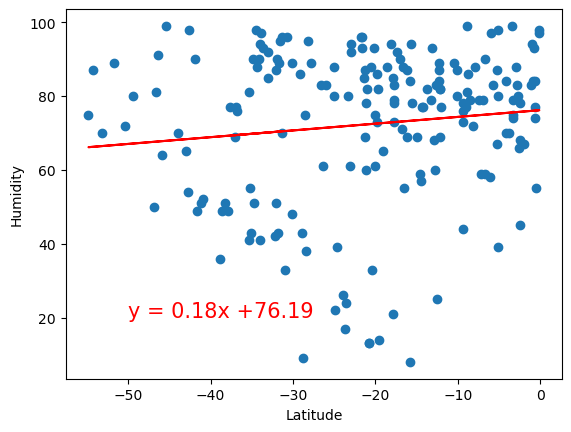

In [65]:
# Southern Hemisphere
# Create Scatter plot
x_vals = southern_hemi_df['Lat']
y_vals = southern_hemi_df['Humidity']
plt.scatter(x_vals,y_vals)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Linear regression with northern hemi df
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_vals * slope + intercept

# plot regression line and equation
plt.annotate(line_eq,(-50,20),fontsize=15,color='red')
plt.plot(x_vals,regress_values,'r-')

# Print r value
print(f'The r-squared value is: {rvalue**2}')

plt.show()

**Discussion about the linear relationship:** I would say there is no linear relationship between latitude and humidity. The extremely low r and r-squared values as well as the scatter plots indicate there is not much of a correlation if there is any at all. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.013357894226023794


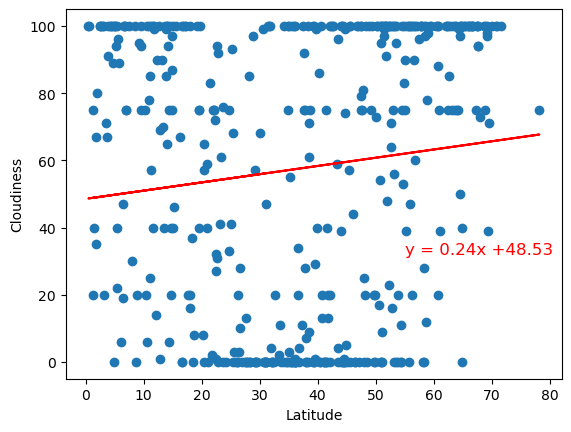

In [71]:
# Northern Hemisphere
# Create Scatter plot
x_vals = northern_hemi_df['Lat']
y_vals = northern_hemi_df['Cloudiness']
plt.scatter(x_vals,y_vals)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Linear regression with northern hemi df
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_vals * slope + intercept

# plot regression line and equation
plt.annotate(line_eq,(55,32),fontsize=12,color='red')
plt.plot(x_vals,regress_values,'r-')

# Print r value
print(f'The r-squared value is: {rvalue**2}')

plt.show()

The r-squared value is: 0.0012793516329497345


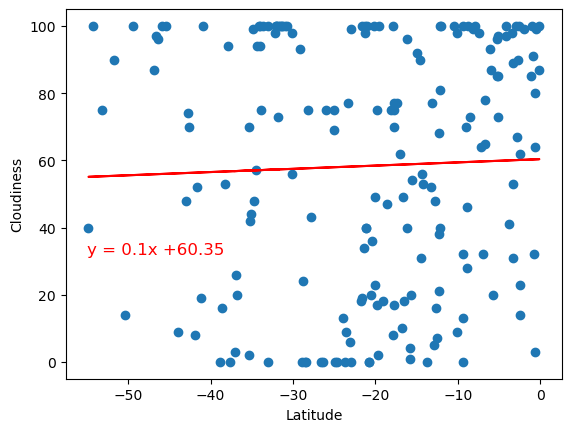

In [72]:
# Southern Hemisphere
# Create Scatter plot
x_vals = southern_hemi_df['Lat']
y_vals = southern_hemi_df['Cloudiness']
plt.scatter(x_vals,y_vals)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Linear regression with northern hemi df
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_vals * slope + intercept

# plot regression line and equation
plt.annotate(line_eq,(-55,32),fontsize=12,color='red')
plt.plot(x_vals,regress_values,'r-')

# Print r value
print(f'The r-squared value is: {rvalue**2}')

plt.show()

**Discussion about the linear relationship:** Again, I see no linear relationships between latitude and cloudiness in either hemisphere. This is due to the very low r/r-squared values.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.059856060667339395


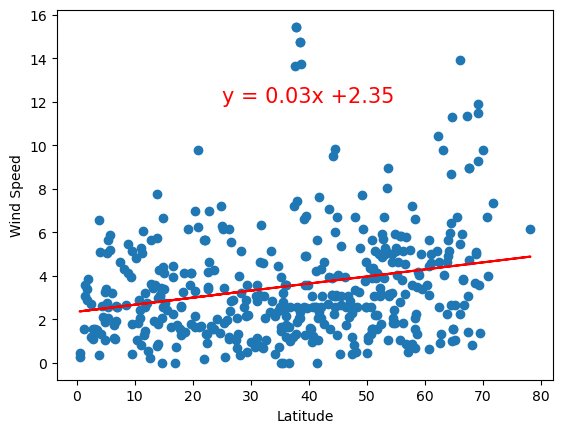

In [74]:
# Northern Hemisphere
# Create Scatter plot
x_vals = northern_hemi_df['Lat']
y_vals = northern_hemi_df['Wind Speed']
plt.scatter(x_vals,y_vals)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Linear regression with northern hemi df
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_vals * slope + intercept

# plot regression line and equation
plt.annotate(line_eq,(25,12),fontsize=15,color='red')
plt.plot(x_vals,regress_values,'r-')

# Print r value
print(f'The r-squared value is: {rvalue**2}')

plt.show()

The r-squared value is: 0.07323138034590146


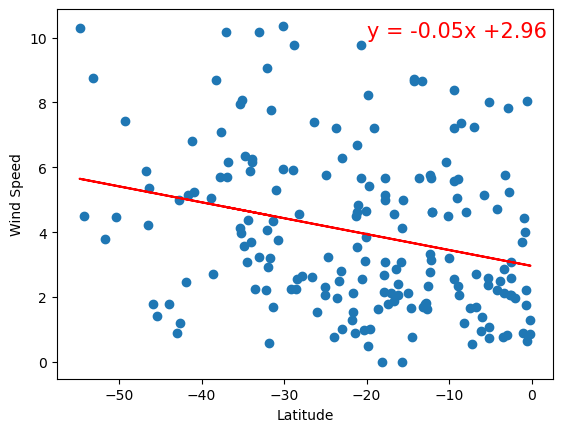

In [78]:
# Southern Hemisphere
# Create Scatter plot
x_vals = southern_hemi_df['Lat']
y_vals = southern_hemi_df['Wind Speed']
plt.scatter(x_vals,y_vals)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Linear regression with northern hemi df
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_vals * slope + intercept

# plot regression line and equation
plt.annotate(line_eq,(-20,10),fontsize=15,color='red')
plt.plot(x_vals,regress_values,'r-')

# Print r value
print(f'The r-squared value is: {rvalue**2}')

plt.show()

**Discussion about the linear relationship:** It appears there may be a slight correlation between latitude and wind speed, positive in the northern hemisphere and negaative in the southern. The r and r-squared values are still very low so the correlation is very small and could just be in this particular sample. 